# Coursework 1 - Mathematics for Machine Learning

## Due: 25/03/2025

## CID: 06012216

***
***

## Exercise 1: Quick questions [2 points]

#### Question 1:

In the Adam algorithm $\mathbf{\hat{s}}$ and $\mathbf{\hat{r}}$ represent the unbiased first and second moment estimators, which estimate the expectation and the variance of the gradients respectively.

We use an exponentially moving average for $\mathbf{s}$ and $\mathbf{r}$ to apply more weight to recent gradients. However since $\mathbf{s}$ and $\mathbf{r}$ are both initialised to $0$, our estimators $\mathbf{s}$ and $\mathbf{r}$ will be biased towards 0, especially for values early in the training process. We want these values to be unbiased estimators for the moments of the gradient.

However:

\begin{align}
  \mathbf{s}_t &= \beta_1 \mathbf{s}_{t-1} + (1- \beta_1) \mathbf{g}_t \\
  &= \beta_1(\beta_1 \mathbf{s}_{t-2} + (1- \beta_1) \mathbf{g}_{t-1} ) + (1- \beta_1) \mathbf{g}_t \\
  &= \beta_1 ^2 \mathbf{s}_{t-2} + \beta_1 (1- \beta_1) \mathbf{g}_{t-1} + (1- \beta_1) \mathbf{g}_t \\
  &= \cdots \\
  &= (1- \beta_1) \sum_{i=1}^{t} \beta_{1}^{t-i} \mathbf{g}_{i}
\end{align}

where the final line follows from $\mathbf{s}_{0} = 0$. Then

\begin{align}
  \mathbb{E}[\mathbf{s}_t] &= \mathbb{E}\left[(1- \beta_1) \sum_{i=1}^{t} \beta_{1}^{t-i} \mathbf{g}_{i}\right] \\
  &= (1- \beta_1) \sum_{i=1}^{t} \mathbb{E}\left[\beta_{1}^{t-i} \mathbf{g}_{i} \right] \\
  &= (1- \beta_1) \sum_{i=1}^{t} \beta_{1}^{t-i} \mathbb{E}[\mathbf{g}_{i}] \\
  &= (1- \beta_1) \cdot \alpha_1 \sum_{i=1}^{t} \beta_{1}^{t-i} \\
  &= (1- \beta_1) \cdot \alpha_1 \frac{1- \beta_1^t}{1- \beta_1} \\
  &= (1- \beta_1^t) \cdot \alpha_1
\end{align}

where, under the assumption of stationarity of gradients, we have $\alpha_1 = \mathbb{E}[\mathbf{g}_{i}] \; \forall i \in \{1,...,t\}$, the true first moment of the gradient at any time. (This stationarity assumption makes the proof more simple, but is not necessary for a sufficiently good approximation. <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1))

As such, we scale $\mathbf{\hat{s}}_t = \frac{\mathbf{s}_t}{(1- \beta_1^t)}$ so that $\mathbb{E}[\mathbf{\hat{s}}_t] = \alpha_1$ as necessary.

Similarly, we find that $\mathbf{r}_t = (1- \beta_2^t) \cdot \ \alpha_2 $ where $\alpha_2 = \mathbb{E}[\mathbf{g}_{i} \odot \mathbf{g}_{i}] \; \forall i \in \{1,...,t\}$. Therefore we also take $\mathbf{\hat{r}}_t = \frac{\mathbf{r}_t}{(1- \beta_2^t)}$.

<br>

If we did not rescale our estimators to make them unbiased, then we will get much slower convergence. To see this, consider the learning rate parameter update step $\theta = \theta - \varepsilon \frac{\mathbf{\hat{s}}}{\delta + \sqrt{\mathbf{\hat{r}}}}$. The small size of $\mathbf{\hat{s}}$ would have the dominant effect over the $\sqrt{\mathbf{\hat{s}}}$ in the denominator, and as such the learning rate will only by updated by a very small negative value. Since $\theta$ chanegs very little in the earleir iterations, the model will make slower progress and hence we will get slower convegence. (In the long term, $1- \beta_1^t$ and $1- \beta_2^t$ both approach 1 and as such the bias correction has no impact, so we should still converge, just slower.)

<br>

---

<a name="cite_note-1"></a>1. [^](#cite_ref-1) [Kingma and Ba, 2014] Kingma, D. P. and Ba, J. (2014). Adam: A method for
stochastic optimization. arXiv preprint arXiv:1412.6980.

#### Question 2:

Gradient descent is an iterative algorithm to find minima/maxima of a function. In our context we use it to minimise the loss function, which if convex gives a global minimum.

If our loss function is $J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L(f(\mathbf{x}_i, \theta),y_i)$ where $m$ is the size of the training dataset, we will be interested in the iterative formula

\begin{align*}
  \mathbf{\theta}_{k+1} &= \theta_k - \varepsilon_k \cdot \nabla _{\theta} J(\theta) \\
  &= \theta_k - \varepsilon_k \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla _{\theta} L(f(\mathbf{x}_i, \theta),y_i).
\end{align*}

which moves the parameters $\theta_k$ in the direction of steepest descent to reach the minimum. This involves finding the gradient of this function, which can be extremely computationally expensive when the training dataset size $m$ grows.

 To combat this we can use stochastic gradient descent, which uses a minibatch of $m^{\prime} < m$ samples chosen without replacement in each epoch/iterative step. We approximate the gradient of the loss over this minibatch, that is

\begin{align*}
  \nabla _{\theta} J(\theta) &= \sum_{i=1}^{m} \nabla _{\theta} L(f(\mathbf{x}_i, \theta),y_i) \\
  &\approx \sum_{i=1}^{m^{\prime}} \nabla _{\theta} L(f(\mathbf{x}_i, \theta),y_i)
\end{align*}

Since we require much less computations when approximating the gradient compared to when directly computing it, the iterative scheme runs much faster. However we no longer have guaranteed convergence as we did with standard gradient descent.

#### Question 3:

Let $W_{ij} \sim \mathcal{N}(0, \sigma_{n}^2)$. Then $\text{Var}(a_j) = \text{Var}(\sum_{j=1}^{n} W_{ij}x_{j})$. Since we are working with a fully connected neural network, all nodes have the same distribution; denote $\text{Var}(x_i) = \text{Var}(x)$ for all $i$. Then the variance of the pre-activations are

\begin{align*}
  \text{Var}(a_j) &= \text{Var}(\sum_{j=1}^{n} W_{ij}x_{j}) \\
  &= \sum_{j=1}^{n} \text{Var}(W_{ij} x_j) \\
  &= \sum_{j=1}^{n} \text{Var}(W_{ij}) \text{Var}(x_j) \\
  &= \sum_{j=1}^{n} \sigma_{n}^2 \text{Var}(x_j) \\
  &= n \cdot \sigma_{n}^2 \cdot \text{Var}(x).
\end{align*}

where the second and third lines follow by independence of all the weights $W_{ij}$ and all the $x_i$.

Then we can analyse the variance of the post-activations:

\begin{align*}
  \text{Var}(h_j) &= \text{Var}(\sigma_{\text{ReLU}}(a_j)) \\
  &= \frac{1}{2} \text{Var}(a_j) \\
  &= \frac{n}{2} \cdot \sigma_n^2 \cdot \text{Var}(x).
\end{align*}

where the first line follows by the properties of the ReLU function: the Normal distribution with mean 0 is symmetric about 0, so half of this Normal distribution is defined on a negative domain and is mapped to 0 by ReLU. The other half is mapped to itself by ReLU and the variance of the post-activation is half of the variance of the pre-activation.

To ensure that, at initialisation, the variance of any given layer is the same as the variance of the previous layer, we have

$\frac{n}{2} \cdot \sigma_n^2 \cdot \text{Var}(x) = \text{Var}(x) \implies \frac{n}{2} \sigma_n^2 = 1 \implies \sigma_n = \sqrt{\frac{2}{n}}$ as required.

#### Question 4:

When a function is Lipschitz continuous we have a bound on the gradient of the line segment between any two points on the curve. As such a function being Lipschitz continuous controls how much the function can vary, with a smaller Lipschitz parameter being more restrictive on the variation allowed.

In the proof of Theorem 4.2 (or the preceeding Lemma) we use the Lipschitz condition to partition the domain into regions where we approximate the function using piecewise linear components. The Lipschitz criterion ensures that the approximation error between the linear regions and the original function can be bounded by an arbitrarily small $\varepsilon$.

If the function is not Lipschitz then it could possibly have wildly varying gradients as shown in the example image below. As such the line in the proof $|a_s - g(x)| \leq |g(u_s)-g(x)|$ does not give a useful bound since the RHS could always be large regardless of the partition chosen, or even infinite.


***
***

## Exercise 2: [6 points]


### Question 1 [2 points]


We will prove this using the Stone-Weierstrass Theorem from page 92 of the lecture notes.

1. Continuity:

  $\mathcal{F}_{\cos,d}$ is the linear span of functions of the form $a^T \cos(Wx+b)$. Therefore every $f \in \mathcal{F}_{\cos,d}$ is continuous since the composition of continuous functions ($\cos$ and linear functions) is continuous, and a linear combination of continuous functions is also continuous.

2. Non-zero:

  Consider $f(x) = \mathbf{1}_\text{m}^T \cos(\mathbf{0}_{\text{mxd}} \mathbf{x} + \mathbf{0}_\text{m})$, where $\mathbf{0}_{\text{mxd}}$ is an mxd matrix of all 0s, $\mathbf{1}_\text{m}$ is a vector in $\mathbb{R}^m$ of all ones, and $\mathbf{0}_\text{m}$ is a vector in $\mathbb{R}^m$ of all zeros (for some $m>0$).
  
  Take any $\mathbf{x} \in \mathbb{R}^d$. Then $f(\mathbf{x}) = \mathbf{1}_\text{m}^T \cos(\mathbf{0}_{\text{mxd}} \mathbf{x} + \mathbf{0}_\text{m}) = \mathbf{1}_\text{m}^T \cos(\mathbf{0}_{\text{m}}) = \mathbf{1}_\text{m}^T \mathbf{1}_\text{m} = 1 \neq 0$.

3. Separation of points:

  Consider $x \neq x^{\prime} \in \mathbb{R}^d$. Inspired by the function used in the lecture notes to prove $\mathcal{F}_{\exp,d}$ separates points, define $f(z) = \cos \left( \pi \cdot \frac{(z-x^{\prime})^T(x-x^{\prime})}{||x-x^{\prime}||_2 ^2} \right)$ Then $f(x^{\prime}) = \cos(0) = 1 \neq 0 = \cos(1) = f(x)$.

4. Closure under multiplication and vector space operations:

  - Consider $f,g \in \mathcal{F}_{\cos,d}$. Let $f(x) = \sum_{i=1}^{p} a_i^T \cos(W_ix+b_i)$ and $g(x) = \sum_{i=1}^{q} a_i^{\prime T} \cos(W_i^{\prime}x+b_i^{\prime})$.
  
    Then the product

    \begin{align*}
      f(x)g(x) &= \sum_{i=1}^{p} a_i^T \cos(W_ix+b_i) \cdot \sum_{i=1}^{q} a_i^{\prime T} \cos(W_i^{\prime}x+b_i^{\prime}) \\
      &= \sum_{i=1}^{p} \sum_{j=1}^{q} a_i^T a_j^{\prime T} \cos(W_ix+b_i) \cos(W_j^{\prime}x+b_j^{\prime}) \\
      &= \sum_{i=1}^{p} \sum_{j=1}^{q} a_i^T a_j^{\prime T} \cdot \frac{1}{2} \big[ \cos(W_ix+b_i +W_j^{\prime}x + b_j^{\prime}) + \cos(W_ix+b_i - W_j^{\prime}x - b_j^{\prime}) \big] \\
      &= \sum_{i=1}^{p} \sum_{j=1}^{q} \frac{a_i^T a_j^{\prime T}}{2} \big[ \cos[(W_i+W_j^{\prime})x+ (b_i + b_j^{\prime})] + \cos [(W_i-W_j^{\prime})x+ (b_i - b_j^{\prime})] \big] \\
      &= \sum_{i=1}^{p} \sum_{j=1}^{q} \frac{a_i^T a_j^{\prime T}}{2} \cos \big[(W_i+W_j^{\prime})x+ (b_i + b_j^{\prime}) \big] + \frac{a_i^T a_j^{\prime T}}{2} \cos \big[(W_i-W_j^{\prime})x+ (b_i - b_j^{\prime}) \big] \\
      &\in \mathcal{F}_{\cos,d}
    \end{align*}

    where the last line follows since $\mathcal{F}_{\cos,d}$ is the linear span of functions of the form $a^T \cos(Wx+b)$.

    Closure under vector space operations:

    - Consider $f,g \in \mathcal{F}_{\cos,d}$. Let $f(x) = \sum_{i=1}^{p} a_i^T \cos(W_ix+b_i)$ and $g(x) = \sum_{i=1}^{q} a_i^{\prime T} \cos(W_i^{\prime}x+b_i^{\prime})$.
   
      We know that a sum of cosines can be expressed as a single cosine with a phase shift, by the properties of sinusoidal functions. We also know that for a given $f$, $\alpha f \in \mathcal{F}_{\cos,d}$ where $\alpha \in \mathbb{R}$ also since $\mathcal{F}_{\cos,d}$ is the linear span. Therefore we have that $\alpha f+g \in \mathcal{F}_{\cos,d}$ also.

    

Therefore $\mathcal{F}_{\cos,d}$ is a universal approximator by the Stone-Weierstrass Theorem.


***

### Question 2 [2 points]

I think I have it in width $d+2$; $x$ being in $[0,1]^d$ has simplified things a lot. (I wrote this really messily on paper so I may have skipped some details here sadly.)

Define $u = A_{1}x + b_{1}$ to be a vector in $\mathbb{R}^w$. As such our goal is to construct the neural network to compute the dot product $A_2 \cdot \sigma(u)$ where the ReLU activation function is applied elementwise.

The strategy we employ is to store the vector $x$ in each hidden layer. Since $x \in [0,1]^d$ we know that $\sigma(x)=x$. (This takes up $d$ neurons in each layer since $x \in [0,1]^d$.)

We will have two further neurons in each layer. The first will store the running total of the partial sums $\sum_{i=1}^{k} A_{2 i} \sigma(u_{i})$ for all $1 \leq k \leq w$. Note that the final partial sum is equal to the value we want to find, $A_2 \cdot \sigma(u)$. However, the ReLU layers may end up setting this running total to 0 if the partial sums end up being negative. As such, we have to add a very large number $C$ before taking the ReLU in the second hidden layer, which will be subtracted at the very last hidden layer. (This will be formalised later.)

The second neuron will store the value $u_{k}$ at the end of the linear layer of the kth hidden layer, and then $\sigma(u_{k})$ at the end of the ReLU layer of the kth hidden layer. This will then be added to the running total neuron in the linear layer of the (k+1)th hidden layer. Note that this can be computed since we are preserving x in the first d neurons of each hidden layer, and $u_{k} = (A_1 x + b_1)_k$.

(I've tried to upload the image below hopefully it works.)

Now we outline how to find $C$. The difficulty is because $u$ depends on x, but we require this neural network to work for any given input x. In order for every single ReLU to have no effect on the (d+1)th neuron storing the partial sums, we need it to exceed all the partial sums. This would mean that we could add $C$ at the start of the second hidden layer, forcing the running total and all future running totals to be positive hence making the ReLU function not a problem. Then, to get our original value back, we subtract $C$ in the linear layer of the output.

Since we need $C$ to exceed all partial sums, it is sufficient for $C > \sum_{i=1}^{w} |A_{2i}\sigma(u_{i})|$ using the triangle inequality.

If we define $m(x)$ to be the elementwise absolute value, that is $m(x_1,x_2,...,x_n) = (|x_1|,|x_2|,...,|x_n|)$ then we can rewrite this sufficient condition as $C > m(A_2) \cdot \sigma(u)$ where this is again a dot product.

For a non-constructive argument we could take $C = \sup_{x \in [0,1]^d} m(A_2) \cdot \sigma(u)$ which we know exists because we have taken a the supremum of a continuous function (linear functions are continuous as are $\sigma$ and $|.|$) over a compact domain $[0,1]^d$ since continuity implies boundedness due to the compact domain.

Here I attempt to make a constructive argument for $C$. We require $C > m(A_2) \cdot \sigma(u)$.

We can equivalently require $C > || m(A_2) \cdot \sigma(u) ||_{l^1}$ where this is the $l^1$ norm. Then we can use Cauchy-Schwarz which applies to $l^{p}$ norms to say $||m(A_2)||_{l^1}  ||\sigma(u)||_{l^1} \geq || m(A_2) \cdot \sigma(u) ||_{l^1}$ and so it is sufficient for $C > ||m(A_2)||_{l^1}  ||\sigma(u)||_{l^1}$. Now $||m(A_2)||_{l^1}$ is just a constant, and $||\sigma(u)||_{l^1}$ can be bounded using a sledgehammer bound:

- First we observe that $||u||_{l^{1}} \geq ||\sigma(u)||_{l^{1}}$ and $||u||_{l^{1}} \geq ||A_1 x||_{l^1} + ||b_1||^{l^{1}}$ using the triangle inequality.

- Then the slegehammer bound is just $||\sigma(u)||_{l^1} < d \cdot w \cdot [\max_{i,j} |A_{1_{i,j}}|] \cdot ||x||_{l^1} + ||b_1||_{l^1}$

- And $||x||_{l^1} \leq d$ since $x \in [0,1]^d$, so choose any $C$ such that:

    $C > (d^2 \cdot w \cdot \max_{i,j} |A_{1_{i,j}}| + ||b_1||_{l^1}) \cdot ||m(A_2)||_{l^1}$


(I may have abused the notation of the $l^1$ norm here slightly, taking the $l^1$ norm of a scalar to be simply its magnitude.)

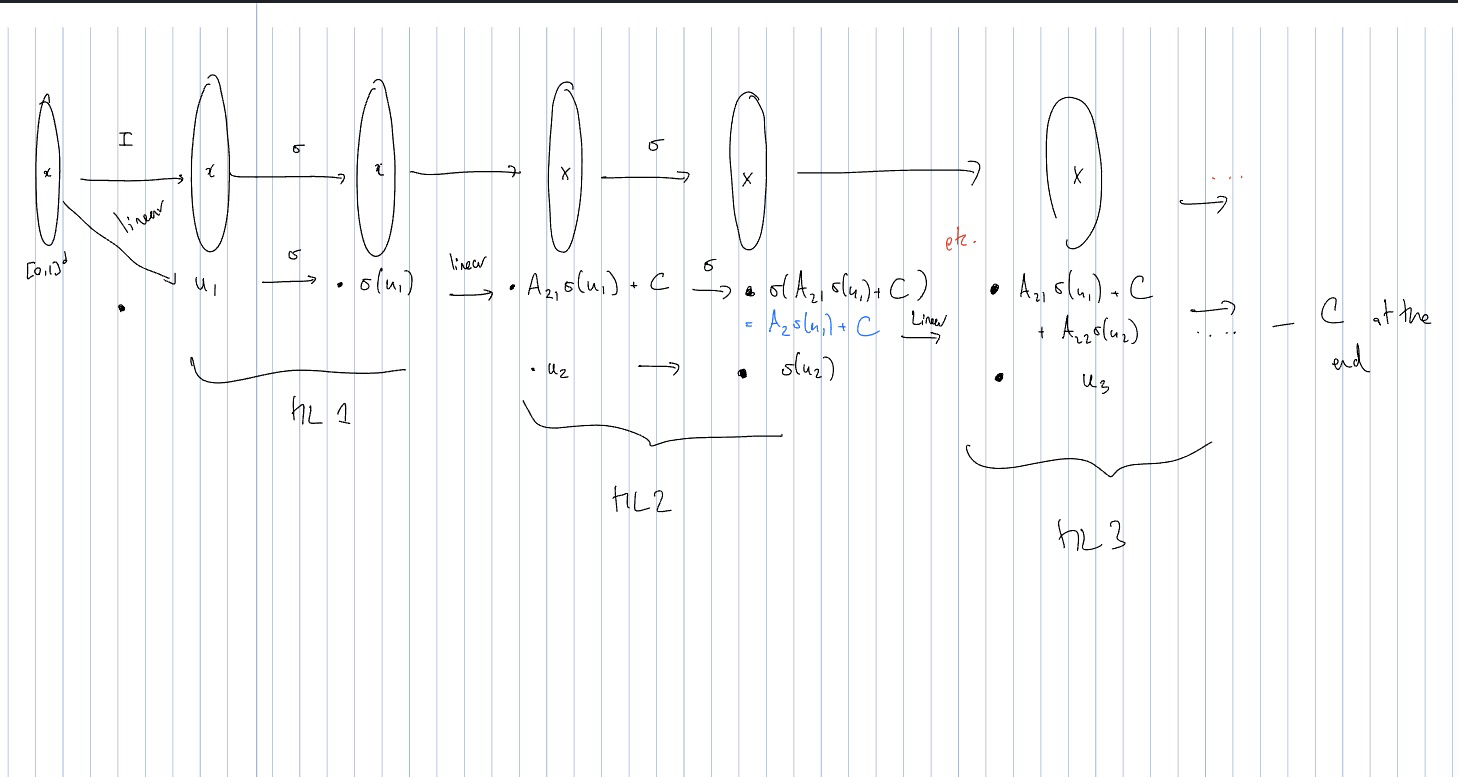

***

### Question 3 [2 points]

1. Here the learning rate is too small. We can see that the loss is progressively decreasing, albeit slowly. Furthermore, by the end of the x-axis it appears that the loss is still decreasing. This means that we will require a very large number of epochs before the model's loss converges to its minimum. As such we should rerun the model multiple times while increasing the learning rate each time: successively increase the learning rate until we no longer observe convergence. Then, take the highest learning rate which allowed the model's loss to still converge. This would give an appropriate learning rate.

2. Here the learning rate is too high. We observe that the loss has decreased initially, but then regularly spikes rather than converging. This indicates that in each step of SGD we overshoot the minimum (or multiple local minima), and in effect end up zig-zagging around it, rather than converging smoothly to a local minimum point. We should rerun the model multiple times while decreasing the learning rate each time: successively decrease the learning rate until we first observe convergence. This would give the largest possible learning rate where the model converges; if we go any lower then we unnecessarily require more epochs to converge.

3. Here the learning rate has been chosen appropriately. We observe that the loss function decreases very rapidly initially, and then converges to around 0 in a relatively acceptable number of epochs, 500. The learning rate was initially high enough such that the model could quickly escape the region of high loss at the beginning due to initialisation, but small enough where the model does not zig-zag later on when approaching the local minimum. Both aspects of the behaviour (initial and later) contrast that of the models from the first 2 plots.

***
***

## Exercise 3: Implementation [13 points]

In [16]:
import os
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


## Part 1: Image classification [4 points]

***
### Question 1 [0.5 point]


Download the dataset from
https://chaladze.com/l5/img/Linnaeus%205%2032X32.rar
and uncompress the .rar dataset to a folder named "Linnaeus_5_32X32" in the current directory.
This folder contains a subfolder "Linnaeus 5 32X32", which contains a test and a train folder with the images of the dataset in 5 different classes: berry, bird, dog, flower, other.

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.ImageFolder(root="./Linnaeus 5 32X32/train", transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.ImageFolder(root="./Linnaeus 5 32X32/test", transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('berry', 'bird', 'dog', 'flower', 'other')

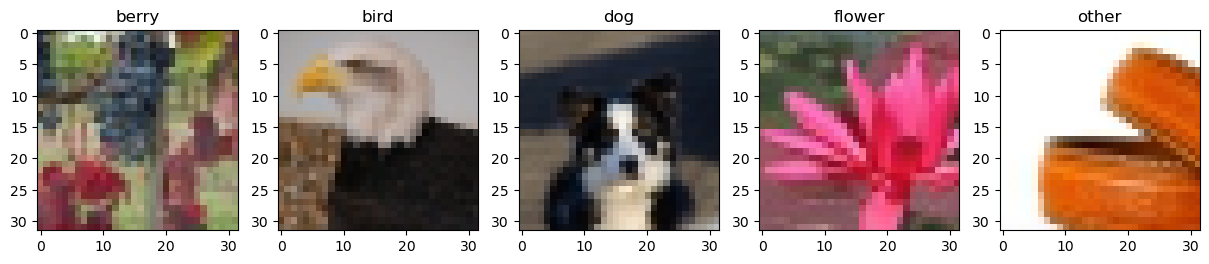

In [21]:
# Code copied from Tutorial 4
dataiter = iter(trainloader)
images, labels = next(dataiter)

fig, axs = plt.subplots(1,5,figsize=(15,5))

unique_labels, indices = np.unique(labels, return_index=True)

# Loop over the indices of the unique classes and print a random image from each
for i, j in enumerate(indices):
  img = images[j] # take the jth image
  img = img / 2 + 0.5     # unnormalize

  # Print the image
  npimg = img.numpy() # translate to numpy
  npimg_t = np.transpose(npimg, (1, 2, 0))
  axs[i].imshow(npimg_t)
  axs[i].set_title(str(classes[labels[j]]))

***
### Question 2 [0.5 point]

```
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
```

This code is used in creating the data loaders, converting the images to torch tensors for classification later on. From the documentation, ToTensor() also scales the pixel values from the RGB JPEG files into the range $[0,1]$.

We also normalise the values; the code specifies a mean of 0.5 and a standard deviation of 0.5 for each channel. The normalisation uses the formula $\text{output} = \frac{\text{input} - \text{mean}}{\text{standard deviation}}$, and as such the values for each channel become centered around mean 0 with standard deviation 1.

If a pixel had a value of 255 in a channel for example, then the ReLU activation function will recieve a very large value as an input. in our backpropogation algorithm (chain rule) we will therefore have very large gradient updates, leading to more unstable parameter updates. This leads to slower convergence and can also lead to numerical instability issues, which normalisation aims to prevent.

If we were using stochastic gradient descent then there would also be the issue of different learned features existing on very different scales, leading to ineffective updates using a single global learning rate. Since we are using the an adaptive optimiser, Adam, this issue is less prevalent. However normalisation is still important since the Adam algorithm might still be too aggressive in updating gradients due to the different scales.

***
### Question 3 [1 point]

In [25]:
class myCNN(nn.Module):
    def __init__(self):
        # Initialise the child class by inheriting the logic from the nn.Module parent class
        super(myCNN, self).__init__()

        # Define the building blocks for the neural network
        # 6 Convolutional Layers (of varying sizes)
        # Number of input channels matches the number of output channels of the previous layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        # Max-pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 3 Fully connected layers
        self.fc1 = nn.Linear(4096, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 5)

    def forward(self, x):
        # Build the neural network through the forward pass

        # First 2 convoultional layers and a max-pooling layer
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # 3rd and 4th convoultional layers and a max-pooling layer
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)

        # 5th and 6th convoultional layers and a max-pooling layer
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.pool(x)

        # Flatten output (into 1 dimension)
        x = x.view(-1, 4096)

        # 3 Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # exclude ReLU for the output

        return x

***
### Question 4 [1 point]

In [27]:
import torchsummary

# This is a workaround I found online to get it working with my PC locally
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = myCNN().to(device)
model_cpu = myCNN().to("cpu")
torchsummary.summary(model_cpu, (3, 32, 32))
model = model.to(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
            Conv2d-2           [-1, 64, 32, 32]          18,496
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
            Conv2d-5          [-1, 128, 16, 16]         147,584
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
            Conv2d-8            [-1, 256, 8, 8]         590,080
         MaxPool2d-9            [-1, 256, 4, 4]               0
           Linear-10                  [-1, 512]       2,097,664
           Linear-11                   [-1, 64]          32,832
           Linear-12                    [-1, 5]             325
Total params: 3,256,901
Trainable params: 3,256,901
Non-trainable params: 0
---------------------------

***
### Question 5 [1 point]

In [29]:
# Code copied from Tutorial 4
def train(model, nr_epochs, optimizer, criterion, trainloader):
    losses = [] # store the losses

    for epoch in range(0, nr_epochs):
        print(f'Epoch {epoch}')
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Compute the output for all the images in the batch_size
            outputs = model(images)
            # Compute the loss value
            loss = criterion(outputs, labels)
            # Compute the gradients
            loss.backward()
            # Take the optimisation step
            optimizer.step()

            # print statistics
            losses += [loss.item()]
            if i % 10 == 0:    # print every 10 iterations
                print(i, loss.item())

    print('Finished Training')

***
### Question 6 [0.5 point]

In [31]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = myCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model, nr_epochs=30, optimizer=optimizer, criterion=criterion, trainloader=trainloader)

Epoch 0
0 1.6114107370376587
10 1.6095775365829468
20 1.5826915502548218
30 1.6091694831848145
40 1.5529279708862305
Epoch 1
0 1.4291229248046875
10 1.4221112728118896
20 1.3768367767333984
30 1.3443933725357056
40 1.3616888523101807
Epoch 2
0 1.3183414936065674
10 1.3471283912658691
20 1.228371500968933
30 1.3086791038513184
40 1.3392784595489502
Epoch 3
0 1.3826079368591309
10 1.2686889171600342
20 1.2338403463363647
30 1.2973802089691162
40 1.1888439655303955
Epoch 4
0 1.1964983940124512
10 1.205397367477417
20 1.204603672027588
30 1.0892512798309326
40 1.0691890716552734
Epoch 5
0 1.1358344554901123
10 1.048701524734497
20 1.063020944595337
30 1.0865123271942139
40 1.1467581987380981
Epoch 6
0 1.1030304431915283
10 1.0012283325195312
20 1.1868096590042114
30 0.9976749420166016
40 1.1421395540237427
Epoch 7
0 0.9937803745269775
10 0.9109876155853271
20 0.9286831021308899
30 1.03342604637146
40 1.1059902906417847
Epoch 8
0 0.9253074526786804
10 0.8977077007293701
20 0.837277948856353

***
### Question 7 [0.5 point]

In [33]:
# Function closely follows code from Tutorial 4
def accuracy(model, testloader):
    class_correct = [0] * len(classes)
    class_total = [0] * len(classes)
    model.eval()
    # since we're not training, we don't need to calculate the gradients for our outputs; therefore there
    # is no need to store the computational graph in between
    with torch.no_grad():
        for data in testloader: #iterate over all the test images
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)

            # compare the predictions and the labels, squeezing to fix tensor dimensions
            c = (predicted == labels).squeeze()
            # count the booleans for each class
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    # Print accuracy for each class
    for i in range(len(classes)):
        if class_total[i] > 0:
            accuracy = 100 * class_correct[i] / class_total[i]
        else:
            accuracy = 0
        print(f'Accuracy of {classes[i]}: {accuracy:.2f}%')

# accuracy(model, testloader, classes, device)
accuracy(model, testloader)

Accuracy of berry: 75.00%
Accuracy of bird: 57.00%
Accuracy of dog: 83.75%
Accuracy of flower: 75.75%
Accuracy of other: 52.75%


***
## Part 2: Fine-tuning a pretrained model [3.5 points]

### Question 1 [0.5 point]

In [36]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset_small = torchvision.datasets.ImageFolder(root="./Linnaeus 5 32X32 small/train", transform=transform)

trainloader_small = torch.utils.data.DataLoader(trainset_small, batch_size=batch_size, shuffle=True)

testset_small = torchvision.datasets.ImageFolder(root="./Linnaeus 5 32X32 small/test", transform=transform)

testloader_small = torch.utils.data.DataLoader(testset_small, batch_size=batch_size, shuffle=False)

classes = ('dog', 'flower')

***
### Question 2 [1 point]

In [38]:
class myMLP(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the building blocks for the neural network
        # 3 Fully connected layers (of varying sizes)
        # Number of input channels matches the number of output channels of the previous layer

        # The first layer has 5 input nodes. This is because we take the input for this MLP as the output of the already trained CNN.
        # Since the image classification problem had 5 classes, we take in 5 input nodes.
        self.fc1 = nn.Linear(5, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        # Build the neural network through the forward pass

        # Apply the ReLU functions to each hidden layer output
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Here we use a log_softmax output function
        x = F.log_softmax(x,dim=1)
    
        return x

- The first layer has 5 input nodes. This is because we take the input for the MLP to be the output of the pre-trained CNN. Since the image classification problem had 5 classes, we take in 5 input nodes.

- We used a LogSoftmax output function. From the PyTorch documentation on the negative log-likelihood loss we have the clear indication: "obtaining log-probabilities in a neural network is easily achieved by adding a LogSoftmax layer in the last layer of your network".

- This aligns with the lecture notes section '3.3.1.2 Output layers, Softmax units'. We are in the same setting: we generalise the use of the sigmoid function for multi-class classification, requiring the output to be a probability distribution (hence the softmax). Considering this as a maximum likelihood estimation problem, we derive that the respective cost function is $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=0}^{n-1} y_{i,j} \log \hat{y}_{i,j}$, which is exactly the negative log-likelihood loss function.

In [40]:
model2 = myMLP()
torchsummary.summary(model2, input_size=(1,5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]             768
            Linear-2               [-1, 1, 128]          16,512
Total params: 17,280
Trainable params: 17,280
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


***
### Question 3 [0.5 point]

In [42]:
def fine_tune(myCNN, myMLP, nr_epochs, optimizer, criterion, trainloader):
    losses = [] # store the losses
    # Set myCNN to evaluation and myMLP to training
    myCNN.eval()
    myMLP.train()

    for epoch in range(0, nr_epochs):
        print(f'Epoch {epoch}')
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Get the features from myCNN: gradient computations aren't required for this
            with torch.no_grad():
                features = myCNN(images)
            # Find the outputs using these fine-tuned features as the input of the MLP
            outputs = myMLP(features)
            # Compute the loss value
            loss = criterion(outputs, labels)
            # Compute the gradients
            loss.backward()
            # Take the optimisation step
            optimizer.step()

            # print statistics
            losses += [loss.item()]
            if i % 10 == 0:    # print every 10 iterations
                print(i, loss.item())

    print('Finished Training')

***
### Question 4 [0.5 point]

In [44]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
fine_tuned_mlp = myMLP().to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(fine_tuned_mlp.parameters(), lr=0.001)

fine_tune(myCNN=model, myMLP=fine_tuned_mlp, nr_epochs=30, optimizer=optimizer, criterion=criterion, trainloader=trainloader_small)

Epoch 0
0 7.339286804199219
10 2.255352735519409
Epoch 1
0 0.8740987181663513
10 0.3103773593902588
Epoch 2
0 0.12334909290075302
10 0.078691765666008
Epoch 3
0 0.05542999505996704
10 0.060741402208805084
Epoch 4
0 0.028810374438762665
10 0.03550997003912926
Epoch 5
0 0.02729291468858719
10 0.01502026803791523
Epoch 6
0 0.024004971608519554
10 0.027069896459579468
Epoch 7
0 0.016717884689569473
10 0.016729939728975296
Epoch 8
0 0.009759970009326935
10 0.014454592019319534
Epoch 9
0 0.023115891963243484
10 0.01577489636838436
Epoch 10
0 0.007956193760037422
10 0.019228950142860413
Epoch 11
0 0.003463376546278596
10 0.008836988359689713
Epoch 12
0 0.014330388978123665
10 0.00979866273701191
Epoch 13
0 0.003568513784557581
10 0.0039799096994102
Epoch 14
0 0.007933506742119789
10 0.0029120072722434998
Epoch 15
0 0.001935937674716115
10 0.006440316326916218
Epoch 16
0 0.005048830062150955
10 0.002517799846827984
Epoch 17
0 0.004487055353820324
10 0.006246103905141354
Epoch 18
0 0.0054826275

***
### Question 5 [1 point]

In [46]:
def accuracy_fine_tune(myCNN, myMLP, testloader):
    class_correct = [0] * len(classes)
    class_total = [0] * len(classes)
    
    # Set both CNN and MLP to evaluation mode
    myCNN.eval()
    myMLP.eval()
    
    # since we're not training, we don't need to calculate the gradients for our outputs; therefore there
    # is no need to store the computational graph in between
    with torch.no_grad():
        for data in testloader:  #iterate over all the test images
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # Get the features from myCNN
            features = myCNN(images)
            # Find the outputs using these fine-tuned features as the input of the MLP
            outputs = myMLP(features)
            # Convert the log_softmax outputs to probabilities
            _, predicted = torch.max(torch.exp(outputs), 1)
            
            # compare the predictions and the labels, squeezing to fix tensor dimensions
            c = (predicted == labels).squeeze()
            # count the booleans for each class
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
    # Print accuracy for each class
    for i in range(len(classes)):
        if class_total[i] > 0:
            accuracy = 100 * class_correct[i] / class_total[i]
        else:
            accuracy = 0
        print(f'Accuracy of {classes[i]}: {accuracy:.2f}%')

accuracy_fine_tune(model, fine_tuned_mlp, testloader_small)

Accuracy of dog: 97.25%
Accuracy of flower: 95.25%


We see a significant improvement in the classification accuracy for dogs and flowers when using the fine-tuned model compared to the original CNN model, with an increase in accuracy of approximately 20%.

The CNN model has learned certain features from the dataset. This could include edges and corners but also shapes like animal ears, leaves etc. Since we have given these features as inputs to the MLP, the model is able to distinguish between the dog images and flower images much more accurately.

We have also removed the other classes, including the 'Other' class which lead to more misclassifications earlier. Since we now only have 2 classes, the model performs better.

***
## Part 3: Adversarial attacks [5.5 points]

***
### Question 1 [1 point]

In [50]:
def adversarial(myCNN, myMLP, image, label, epsilon=0.01):
    original_image = image.clone().detach() # we clone the image an additional time for the epsilon bounding
    image = image.clone().detach() # clone the image to avoid modifying the original
    
    # Define the criterion and algorithm parameters :
    nr_steps = 10
    mu = 1.0
    alpha = epsilon/nr_steps
    criterion = nn.NLLLoss()
    
    image.requires_grad_(True)
    g = 0
    
    # Loop over the number of steps and update the image (line 3)
    for i in range(nr_steps):
        
        # Zero the previous gradients
        if image.grad is not None:
            image.grad.zero_()
        
        # Forward pass through myCNN and myMLP
        output = myCNN(image.unsqueeze(0))
        output = myMLP(output)
        
        # Compute the loss
        loss = criterion(output, label.unsqueeze(0))
        
        # Compute the gradient
        loss.backward()
        grad = image.grad
        
        # Normalise the gradient
        grad_norm = torch.norm(grad.flatten(), p=1)
        normalised_grad = grad/grad_norm
        
        # Update the momentum (line 5)
        g = mu*g + normalised_grad
        
        # Update the image (line 6)
        image = image+alpha*torch.sign(g)

        # Ensure the image values are within the normalised range
        image = torch.max(torch.min(image, original_image+epsilon), original_image-epsilon)
        image = torch.clamp(image, -1.0, 1.0)

        # Added just in case
        image = image.detach()
        image.requires_grad_(True)
    
    # Classify the adversarial image and return the probability for the true label
    with torch.no_grad():
        output = myCNN(image.unsqueeze(0))
        output = myMLP(output)
        p = torch.exp(output)[0][label.item()].item()
        image = image.detach()
    
    # Return adversarial image
    return image, p

***
### Question 2 [1 point]

The parameter $\varepsilon$ is a tolerance controlling how much the adversarial image is allowed to be perturbed from the original image. That is, from the paper, we have $\|\mathbf{x}^* - \mathbf{x}\|_\infty \leq \varepsilon$ where $\mathbf{x}^*$ is the adversarial image and $\mathbf{x}$ is the original image.

The algorithm works by implementing ideas from gradient descent with momentum, whilst also ensuring that the bound $\|\mathbf{x}^* - \mathbf{x}\|_\infty \leq \varepsilon$ is observed. The latter is ensured by the use of the step size $\alpha$: since we initialise $\alpha = \frac{\varepsilon}{T}$ and we loop T times, we can only perturb the original image by a maximum of $\varepsilon$ as desired.

In the loop we compute the loss function of the current iteration adversarial image and find its gradient. We then update the momentum according to the formula $\mathbf{g}_{t+1} = \mu \cdot \mathbf{g}_t + \frac{\nabla_x J(\mathbf{x}_t^{\star},y)}{||\nabla_x J(\mathbf{x}_t^{\star},y)||_1}$. Here we use a normalised gradient to ensure that all directions of the gradient are on the same scale. This ensures no particular component dominates the effect of the update, leading to oscillations around a maximum rather than a direct path. Note that we have an addition term: this ensures that we aim to maximise the loss to make the classifier misclassify the adversarial image. (Also note that the decay rate $\mu$ is simply a parameter that controls how much the previous momenta impact the trajectory of the future momenta.)

We then update the adversarial image using the equation $\mathbf{x}^*_{t+1} = \mathbf{x}^*_t + \alpha \cdot \text{sign}(\mathbf{g}_{t+1})$. This justifies the earlier point regarding the initialisation of $\alpha = \frac{\varepsilon}{T}$.

Loooping over these steps gives us the adversarial image $\mathbf{x}^*$ which is a small perturbation from $\mathbf{x}$, but is specifically designed to make the classifier give the wrong label.

***
### Question 3 [0.5 point]

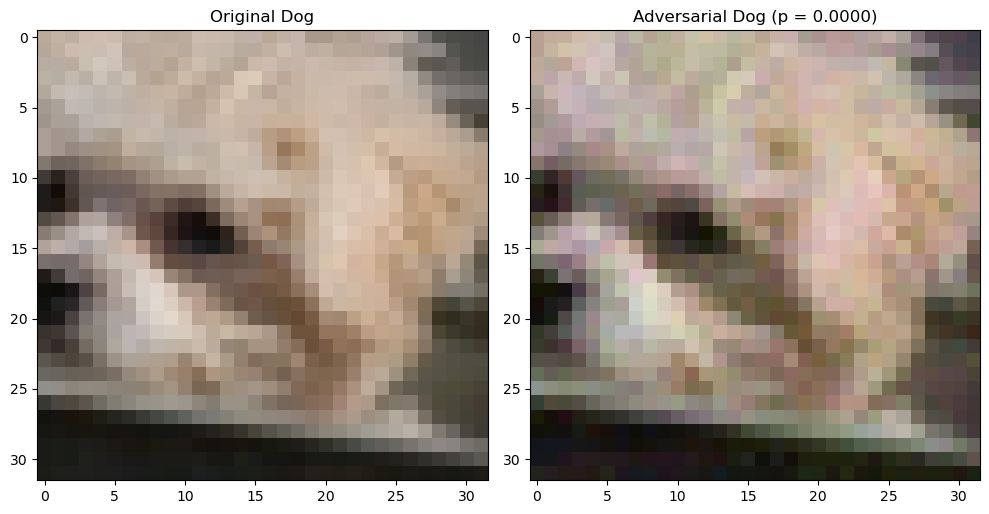

In [54]:
def find_dog_image(testloader):
    for images, labels in testloader:
        dog_indices = torch.where(labels == 0)[0]
        if len(dog_indices) > 0:
            return images[dog_indices[0]], labels[dog_indices[0]]
    print("No dog found.")
    return None, None

def plot_images(original, adversarial, p):
    plt.figure(figsize=(10, 5))

    # Convert the images to numpy
    # We also moved them to the cpu to avoid the images and models being on different devices
    original_np = ((original.cpu().squeeze().permute(1, 2, 0).numpy() * 0.5) + 0.5).clip(0, 1)
    adversarial_np = ((adversarial.cpu().squeeze().permute(1, 2, 0).numpy() * 0.5) + 0.5).clip(0, 1)
    
    plt.subplot(1, 2, 1)
    plt.title("Original Dog")
    plt.imshow(original_np)
    
    plt.subplot(1, 2, 2)
    plt.title(f"Adversarial Dog (p = {p:.4f})")
    plt.imshow(adversarial_np)
    
    plt.tight_layout()
    plt.show()

# Repeatedly call the adversarial function until we find a dog image that is successfully attacked
while True:
    # Find a dog image and call the adversarial function on it
    original_image, label = find_dog_image(testloader_small)
    original_image = original_image.to(device)
    label = label.to(device)
    adversarial_image, p = adversarial(model, fine_tuned_mlp, original_image, label, epsilon=0.05)
    # If the probability of being classified as the true class is less than 0.5 then the attack has been successful
    if p < 0.5:
        break
    
# Plot the results
plot_images(original_image, adversarial_image, p)

***
### Question 4 [1 point]

In [56]:
def accuracy_adversarial(myCNN, myMLP, testloader_small, epsilon):
    myCNN.eval()
    myMLP.eval()

    total_correct = 0
    total_attacked = 0

    # iterate over all batches of the test images
    for data in testloader_small:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Evaluate the fine-tuned model
        with torch.no_grad():
            output = myCNN(images)
            output = myMLP(output)
            _, predicted = torch.max(output.data, 1)

        # Loop over the images classified correctly in the current batch
        for i in range(len(images)):
            if predicted[i] == labels[i]:
                total_correct += 1
                # Generate an adversarial example
                image, p = adversarial(myCNN, myMLP, images[i], labels[i], epsilon)
                # Check if the attack was successful
                if p < 0.5:
                    total_attacked += 1

    # If no images were correctly classified then just return 0
    if total_correct == 0:
        return 0

    return total_attacked / total_correct

success_rate = accuracy_adversarial(model, fine_tuned_mlp, testloader_small, epsilon=0.05)
print(f"Success rate at epsilon = 0.05: {success_rate}")

Success rate at epsilon = 0.05: 0.5584415584415584


***
### Question 5 [1 point]

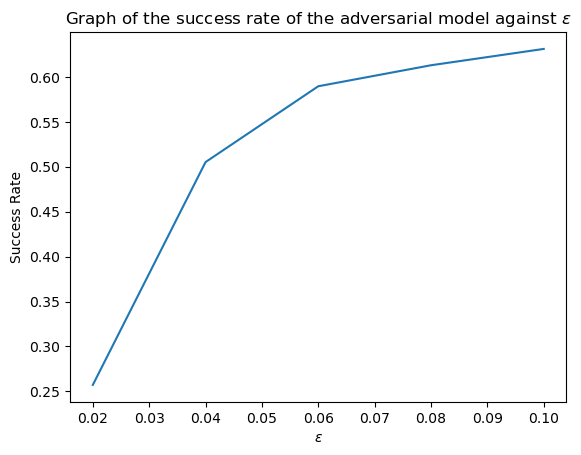

In [63]:
epsilons = [0.02,0.04,0.06,0.08,0.1]
success_rates = np.zeros(len(epsilons))

for i in range(len(epsilons)):
    success_rates[i] = accuracy_adversarial(model, fine_tuned_mlp, testloader_small, epsilon=epsilons[i])

plt.plot(epsilons, success_rates)
plt.title(r"Graph of the success rate of the adversarial model against $\epsilon$")
plt.xlabel(r"$\epsilon$")
plt.ylabel("Success Rate")
plt.show()

The success rate of the attack increases as the tolerance $\varepsilon$ increases. This means that as $\varepsilon$ increases more adversarial dog images are misclassified. $\varepsilon$ controls the difference between the original image and the adversarial image; as $\varepsilon$ increases we have a wider selction of possible adversarial images. As such we are able to 'distort' the image more when $\varepsilon$ increases, meaning that the classification neural network is more liklely to misclassify the dog image.

***
### Question 6 [1 point]

Adversarial attacks in the real world can have significant impacts. For example they can be used to bypass fraud detection security systems: if a facial image is required to verify a transaction, an adversarial image could be used to bypass this verification step. In autonomous vehicles, cameras are used to generate a high-dimensional mapping of the road and surrounding cars; if this is met with a malicious adversarial attack it could potentially obscure cars and lead to traffic accidents and loss of life.

To mitigate the impact of adversarial attacks one could additionally train a model using adversarial images in the training dataset (and in the testing dataset to evaluate performance). This ensures that models are able to classify adversarial images correctly with a higher probability.

Alternatively we could compress the images in the training dataset before training a model. This could reduce the impact of any adversarial perturbations, making the model more likely to classify the adversarial images correctly.